In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datadir = "/kaggle/input/ships-in-aerial-images/ships-aerial-images"
train_path = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/train"
test_path = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/test"

In [3]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.1 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 whic

In [4]:
from ultralytics import YOLO
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
# Define paths to train and test data
train_path = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/train"
test_path = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/test"

# Create the YAML content
yaml_content = f"""
path: /kaggle/input/sptire  # Root directory of your dataset
train: {train_path}/images  # Directory containing training images
val: {test_path}/images  # Directory containing validation images
nc: 1  # Number of classes
names: ['tire']  # Class names

# Specify the labels directory for training and validation data
train_labels: {train_path}/labels  # Path to training labels
val_labels: {test_path}/labels  # Path to validation labels
"""

# Save the YAML file
with open('data1.yaml', 'w') as f:
    f.write(yaml_content)

In [6]:
# Create a YOLOv8 model from scratch
model = YOLO('yolov8n.yaml')  # You can use other architectures like yolov8s.yaml, yolov8m.yaml, etc.

# Train the model using your YAML configuration

# Train model
model.train(
    data='data1.yaml',  # Path to dataset YAML
    epochs=3,  # Increase as needed
    # imgsz=640,  # Image size
    # device=device,  # Use GPU if available
    batch=16,  # Adjust batch size based on GPU memory
    workers=2,  # Number of CPU workers
    augment=True,  # Enable auto augmentation
)
# Adjust epochs as needed

Ultralytics 8.3.122 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=data1.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=tor

100%|██████████| 755k/755k [00:00<00:00, 18.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.2±0.5 ms, read: 3.9±4.0 MB/s, size: 19.7 KB)


train: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/labels... 9697 images, 351 backgrounds, 2 corrupt: 100%|██████████| 9697/9697 [00:23<00:00, 408.62it/s]

train: /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-20071740708637_33-73029905538088_png.rf.330efa80ecbf49d6ceac7071288d64b4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0249]
train: /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-21100741654266_33-732092454738826_png.rf.7243f2b58b505e51950850f4b26081ba.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0079]


WARNING ⚠️ train: Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 709, len(boxes) = 19454. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5.7±1.6 MB/s, size: 19.4 KB)


val: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/test/labels... 1573 images, 51 backgrounds, 0 corrupt: 100%|██████████| 1573/1573 [00:03<00:00, 431.45it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 106, len(boxes) = 2872. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      3.73G      3.085      3.681      3.481         21        640: 100%|██████████| 606/606 [01:41<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:11<00:00,  4.49it/s]


                   all       1573       2872      0.312      0.131     0.0835     0.0208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      3.75G      2.422      2.631      2.546         25        640: 100%|██████████| 606/606 [01:38<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:09<00:00,  5.33it/s]


                   all       1573       2872      0.277      0.275      0.176     0.0651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      4.18G      2.097       2.23      2.205         32        640: 100%|██████████| 606/606 [01:37<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:09<00:00,  5.37it/s]

                   all       1573       2872      0.275      0.322      0.224     0.0939



3 epochs completed in 0.091 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.122 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:17<00:00,  2.93it/s]


                   all       1573       2872      0.272      0.294      0.213      0.095


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 7.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c6fae580e10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images/0__20161102_180658_0e26__-122-34040514248915_37-748761931300486_png.rf.36a27540d7f3580cbdbc5917ea6dbdc5.jpg: 640x640 1 tire, 27.0ms
Speed: 3.4ms preprocess, 27.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


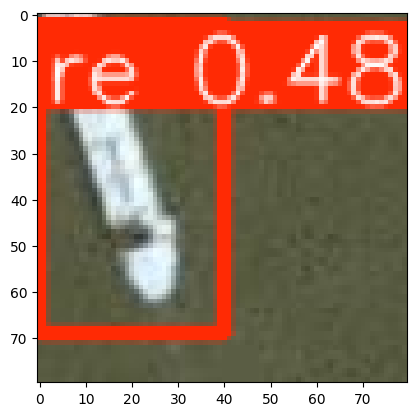

array([[[ 93,  85,  80],
        [171, 140, 131],
        [226, 193, 188],
        ...,
        [ 86,  89,  63],
        [ 86,  89,  63],
        [ 85,  88,  62]],

       [[255,  42,   4],
        [255,  42,   4],
        [255,  42,   4],
        ...,
        [125,  83,  55],
        [121,  80,  51],
        [119,  79,  51]],

       [[255,  42,   4],
        [255,  42,   4],
        [255,  42,   4],
        ...,
        [255,  42,   4],
        [255,  42,   4],
        [255,  42,   4]],

       ...,

       [[ 88,  91,  65],
        [ 88,  91,  65],
        [ 88,  91,  65],
        ...,
        [ 90,  93,  67],
        [ 86,  89,  63],
        [ 85,  88,  62]],

       [[ 87,  90,  64],
        [ 87,  90,  64],
        [ 87,  90,  64],
        ...,
        [ 86,  89,  63],
        [ 85,  88,  62],
        [ 88,  91,  65]],

       [[ 89,  92,  66],
        [ 89,  92,  66],
        [ 89,  92,  66],
        ...,
        [ 83,  86,  60],
        [ 85,  88,  62],
        [ 91,  94,  68]]

In [10]:
# Path to the image you want to test
image_path = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images/0__20161102_180658_0e26__-122-34040514248915_37-748761931300486_png.rf.36a27540d7f3580cbdbc5917ea6dbdc5.jpg'  

# Perform inference
results = model(image_path)
import matplotlib.pyplot as plt
from IPython.display import display

# ... (load model and perform inference as before) ...

# Get the image with bounding boxes as a NumPy array
image_with_boxes = results[0].plot()  

# Display the image using matplotlib
plt.imshow(image_with_boxes)
plt.show()

# Or, display the image using IPython.display
display(image_with_boxes)